In [2]:
import gym
import numpy as np
import random
env = gym.make("MountainCar-v0").env

In [55]:
#inizializzazione della q_table con tutti elementi nulli
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
q_table = np.zeros([num_states[0], num_states[1], env.action_space.n])

In [57]:
#Caricare una Q-table salvata
q_table = np.load('q_table_buona.npy')

In [65]:
#iperparametri
alfa = 0.1
gamma = 0.99
epsilon = 0.8

min_eps = 0

In [66]:
#addestramento della q_table
episodes = 5000
penalties = 0
done = False
epsilon = 0.8

# Calculate episodic reduction in epsilon
reduction = (epsilon - min_eps)/episodes

for i in range(episodes):
    observation = env.reset()
    state = (observation - env.observation_space.low)*np.array([10, 100])
    state = np.round(state, 0).astype(int)
    reward = 0
    iteration = 0
    done = False
    # if i == 100:
    #     limit = 200
    # elif i == 200:
    #     limit = 200
    record = env.observation_space.low[0]
    while not done:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state[0],state[1]])
        
        new_observation, reward, done, _ = env.step(action)
        new_state = (new_observation - env.observation_space.low)*np.array([10, 100])
        new_state = np.round(new_state, 0).astype(int)

        # if new_observation[0] >= 0.5:
        #     reward = 1000
        # elif new_observation[0] > record:
        #     record = new_observation[0]
        #     reward = 10
        if done and new_observation[0] >= 0.5:
                q_table[state[0], state[1], action] = reward
        else:
            old_q = q_table[state[0],state[1], action]

            q_table[state[0],state[1], action] = old_q * (1-alfa) + alfa * (reward + gamma * np.max(q_table[new_state[0],new_state[1]]))
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction

        env.render(mode='close')
        state = new_state
        iteration = iteration + 1
        if iteration >= 100000:
            done = True
    total_iterations.append(iteration)
    print("Episode {} terminated in {} iterations!".format(i+1, iteration))
#Salva la Q-table
np.save("q_table", q_table)

ons!
Episode 4536 terminated in 139 iterations!
Episode 4537 terminated in 138 iterations!
Episode 4538 terminated in 141 iterations!
Episode 4539 terminated in 138 iterations!
Episode 4540 terminated in 135 iterations!
Episode 4541 terminated in 143 iterations!
Episode 4542 terminated in 138 iterations!
Episode 4543 terminated in 137 iterations!
Episode 4544 terminated in 138 iterations!
Episode 4545 terminated in 138 iterations!
Episode 4546 terminated in 141 iterations!
Episode 4547 terminated in 134 iterations!
Episode 4548 terminated in 143 iterations!
Episode 4549 terminated in 138 iterations!
Episode 4550 terminated in 140 iterations!
Episode 4551 terminated in 135 iterations!
Episode 4552 terminated in 138 iterations!
Episode 4553 terminated in 147 iterations!
Episode 4554 terminated in 136 iterations!
Episode 4555 terminated in 148 iterations!
Episode 4556 terminated in 150 iterations!
Episode 4557 terminated in 135 iterations!
Episode 4558 terminated in 138 iterations!
Episod

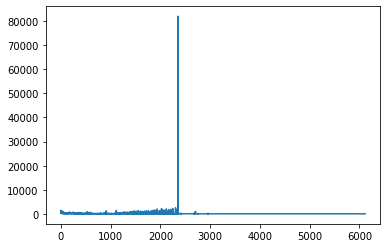

In [75]:
#plot delle iterazioni per episodio durante l'addestramento
import matplotlib.pyplot as plt
plt.plot(range(len(total_iterations)), total_iterations)

In [3]:
#Test dell'agente
q_table = np.load('q_table_ottima.npy')
total_epochs = 0
episodes = 100
out_of_time = 0
failed = 0
total_rewards = [[]]
episode_epochs = []
for i in range(episodes):
    observation = env.reset()
    state = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
    state = np.round(state, 0).astype(int)
    epochs, penalties, reward = 0,0,0

    done = False
    total_rewards.append([])
    while not done:
        action = np.argmax(q_table[state[0],state[1]])
        new_observation, reward, done, _ = env.step(action)
        state = (new_observation - env.observation_space.low)*np.array([10, 100])
        state = np.round(state, 0).astype(int)

        epochs += 1
        env.render()

        if epochs == 200:
            out_of_time += 1
        if epochs == 500:
            done = True
            failed += 1
            out_of_time -= 1
        total_rewards[i].append(reward)
    episode_epochs.append(epochs)
    total_epochs += epochs
    print("Episodio {} terminato in {} iterazioni!".format(i, epochs))
print("Test terminato")

Episodio 0 terminato in 135 iterazioni!
Episodio 1 terminato in 137 iterazioni!
Episodio 2 terminato in 137 iterazioni!
Episodio 3 terminato in 135 iterazioni!
Episodio 4 terminato in 141 iterazioni!
Episodio 5 terminato in 134 iterazioni!
Episodio 6 terminato in 142 iterazioni!
Episodio 7 terminato in 135 iterazioni!
Episodio 8 terminato in 137 iterazioni!
Episodio 9 terminato in 139 iterazioni!
Episodio 10 terminato in 133 iterazioni!
Episodio 11 terminato in 142 iterazioni!
Episodio 12 terminato in 134 iterazioni!
Episodio 13 terminato in 139 iterazioni!
Episodio 14 terminato in 133 iterazioni!
Episodio 15 terminato in 142 iterazioni!
Episodio 16 terminato in 135 iterazioni!
Episodio 17 terminato in 135 iterazioni!
Episodio 18 terminato in 134 iterazioni!
Episodio 19 terminato in 142 iterazioni!
Episodio 20 terminato in 142 iterazioni!
Episodio 21 terminato in 138 iterazioni!
Episodio 22 terminato in 134 iterazioni!
Episodio 23 terminato in 139 iterazioni!
Episodio 24 terminato in 1

In [4]:
print("Episodi complessivi {}, di cui {} falliti e {} successi dopo i 200 step.".format(episodes, failed, out_of_time))
print("La media degli step per episodio è {}".format(total_epochs/episodes))

Episodi complessivi 100, di cui 0 falliti e 0 successi dopo i 200 step.
La media degli step per episodio è 137.38


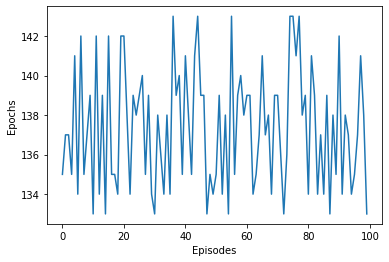

In [5]:
#plot delle iterazioni per episodio durante l'addestramento
import matplotlib.pyplot as plt
plt.xlabel("Episodes")
plt.ylabel("Epochs")
plt.plot(range(len(episode_epochs)), episode_epochs)

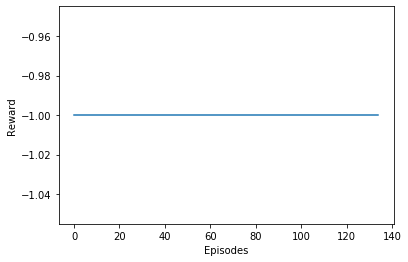

In [7]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.plot(range(len(total_rewards[0])), total_rewards[0])